In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft

In [2]:
dt1=pd.read_csv("Trace_EVT1272065836.908173614_908.2.txt", sep=" ")
dt2=pd.read_csv("Trace_EVT1272070496.820081490_820.1.txt",sep=" ")

dt2=dt2.rename(columns={"Unnamed: 1":"Tiempo Corregido", "LON,LAT,size":"Señal"})

ant=['R9JNN','R9RSR','R9NDJ','R9GLG','R9AZL','R9AEP','R9MRC']

#Separamos los datos de cada una de las antenas
x=dt2.loc[dt2["R9PLT"] == ant[0]].index.values
time=[dt2["Tiempo Corregido"].values[0:int(x)]]
señal=[dt2["Señal"].values[0:int(x)]]

for i in range(1,6):
    y=dt1.loc[dt2["R9PLT"] == ant[i]].index.values
    time.append(dt2["Tiempo Corregido"].values[int(x)+1:int(y)])
    señal.append(dt2["Señal"].values[int(x)+1:int(y)])
    x=y
    
#Agregar la ultima antena
x=dt1.loc[dt2["R9PLT"] == ant[6]].index.values
time.append(dt2["Tiempo Corregido"].values[int(x)+1:])
señal.append(dt2["Señal"].values[int(x)+1:])

señal=[señal[i].astype(int) for i in range(0,7)]


#Ajustar intervalos temporales entre 819 y 821 segundos
T=[]
S=[]
for i in range(len(time)):
    x,y=np.where(time[i]>819),np.where(time[i]<821)
    x,y=x[0][1],y[0][-1]
    T.append(time[i][x:y])
    S.append(señal[i][x:y])

#Definimos función que permite obtener puntos con mismo espacio temporal
def f(t,ant):
    for i in range(len(T[ant])-1):
        if T[ant][i] <t and t<T[ant][i+1]:
            m=(S[ant][i+1]-S[ant][i])/(T[ant][i+1]-T[ant][i])
            b=S[ant][i]-m*T[ant][i]
            f = m*t+b
            break
        elif T[ant][i]==t:
            f=S[ant][i]
    return f

In [3]:
def graf(j):
    a=T[j][0]
    b=T[j][-1]
    paso=0.01
    t=np.arange(a,b,paso)
    s=[]
    for i in range(len(t)):
        s.append(f(t[i],j))
        
        
    y=fft(s)

    N=len(y)
    n=np.arange(N)
    Tt=N/10
    freq=n/Tt

    #plt.figure(figsize=(12,5))
    #plt.subplot(111)
    plt.plot(t,s)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.show()
    

    plt.stem(freq, np.abs(y), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.xlim(0, 10)
    plt.show()


    plt.plot(t, ifft(y), 'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    


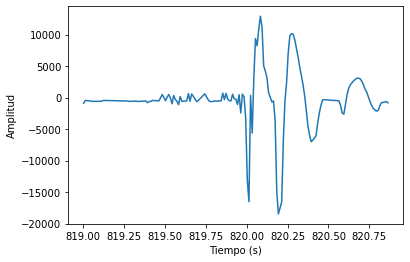

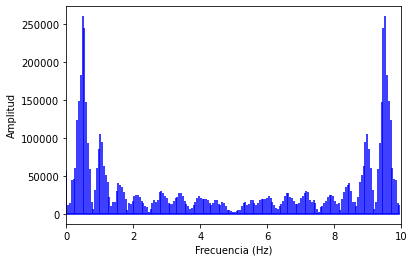

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


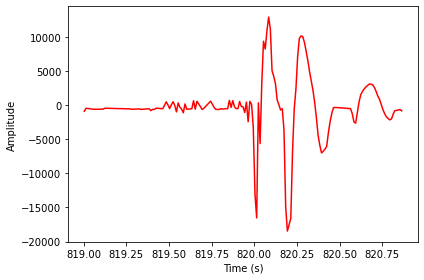

In [7]:
#Tener cuidado con graf(5) porque esa es la antena con pocos datos
graf(0)